<a href="https://colab.research.google.com/github/Faith-InsightData/Cancer-Incidence-Prediction-using-Linear-Regression-/blob/main/linear_regression_on_cancer_data_notes_csv_and_incd_csv_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Goal: This project aims to build a linear regression model to predict the Age-Adjusted Incidence Rate of a disease (likely cancer, based on the data used) using other related variables.


In [49]:
import pandas as pd
pd.df = pd.read_csv('incd.csv')
pd.df = pd.read_csv('cancer_data_notes.csv')



In [48]:
import pandas as pd

df = pd.read_csv('incd.csv') # Assign the DataFrame to the variable 'df'
df = pd.read_csv('cancer_data_notes.csv') # Assign the DataFrame to the variable 'df', overwriting the previous value
print(df.head()) # Now 'df' is defined and can be used

   index Created by statecancerprofiles.cancer.gov on 05/09/2017 5:34 pm.
0      0  Data for the United States does not include da...              
1      1  State Cancer Registries may provide more curre...              
2      2    Incidence rates (cases per 100,000 populatio...              
3      3  à Incidence data come from different sources. ...              
4      4   ¦ Data not available because of state legisla...              


In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

Step 2: Load the datasets (assuming both CSVs are uploaded to Colab)


In [40]:
import pandas as pd

Building the Linear Regression Model

a. Fit the Model
Using a statistical package or programming language (e.g., Python’s sklearn.linear_model), fit the linear regression model to the training data

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Assuming X and y are your features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

b. Model Evaluation

Coefficient of Determination (R²): Measures how much of the variance in the dependent variable is explained by the model.

Adjusted R²: Adjusts for the number of predictors in the model.

Root Mean Squared Error (RMSE): Measures the standard deviation of the residuals (prediction errors).

p-values and t-tests: To assess the statistical significance of each coefficient.

In [31]:
from sklearn.metrics import r2_score, mean_squared_error

# Predicting using the model
y_pred = model.predict(X_test)

# Evaluating the model
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'R²: {r2}')
print(f'RMSE: {rmse}')


R²: 0.9992881078402502
RMSE: 0.49773103087220405


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Diagnostic Checks

a. Residual Plots
Residuals should be normally distributed and randomly scattered around zero.
Plot residuals to check for homoscedasticity and independence

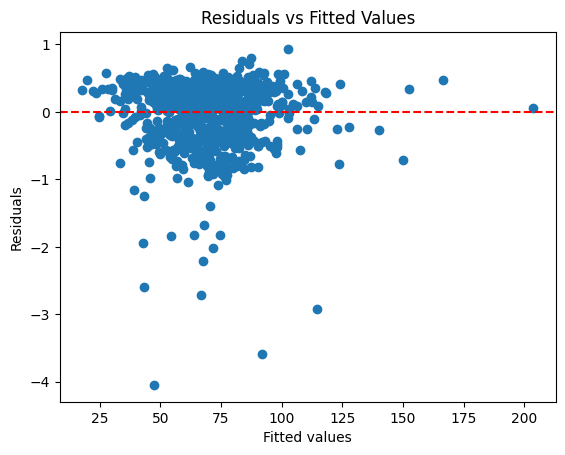

In [32]:
import matplotlib.pyplot as plt

# Residuals
residuals = y_test - y_pred

# Plotting residuals
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()


 Variance Inflation Factor (VIF)

Check for multicollinearity among predictors.

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Calculating VIF for each predictor
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


                         feature        VIF
0  Lower 95% Confidence Interval  24.569971
1  Upper 95% Confidence Interval  24.553727
2           Average Annual Count   1.003480


Interpretation
After building and evaluating the model, interpret the coefficients to understand the relationship between independent and dependent variables.
For example, if
𝛽
1
=
0.5
β
1
​
 =0.5, for every one unit increase in
𝑋
1
X
1
​
 ,
𝑦
y increases by 0.5 units, holding other variables constant.

In [35]:
# 5. Interpretation of the Coefficients

coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

# Print out the coefficients for interpretation
print(coefficients)

# Example interpretation:
# For every unit increase in 'Lower 95% Confidence Interval', 'Age-Adjusted Incidence Rate' increases by the corresponding coefficient value,
# holding all other variables constant.
for i, row in coefficients.iterrows():
    print(f"For every 1 unit increase in {row['Feature']}, the Age-Adjusted Incidence Rate changes by {row['Coefficient']} units, holding other variables constant.")


                         Feature  Coefficient
0  Lower 95% Confidence Interval     0.615862
1  Upper 95% Confidence Interval     0.409313
2           Average Annual Count    -0.000007
For every 1 unit increase in Lower 95% Confidence Interval, the Age-Adjusted Incidence Rate changes by 0.6158622508239459 units, holding other variables constant.
For every 1 unit increase in Upper 95% Confidence Interval, the Age-Adjusted Incidence Rate changes by 0.4093130049343791 units, holding other variables constant.
For every 1 unit increase in Average Annual Count, the Age-Adjusted Incidence Rate changes by -6.736378381388963e-06 units, holding other variables constant.


 Making Predictions

Once the model is validated, it can be used to make predictions on new data.

In [34]:
new_data = [[5.5, 3.1, 4.7]]  # Example new data
prediction = model.predict(new_data)
print(f'Predicted value: {prediction}')


Predicted value: [4.2505528]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [13]:
import pandas as pd

# Assuming 'incd.csv' contains your incidence data
incd_data = pd.read_csv('incd.csv')  # Assign the DataFrame to incd_data

# Clean the "Age-Adjusted Incidence Rate" and other numeric columns by removing non-numeric characters
incd_data_cleaned = incd_data.copy()

# Remove any special characters or non-numeric values in numeric columns
numeric_columns = ['Age-Adjusted Incidence Rate(Ê) - cases per 100,000',
                   'Lower 95% Confidence Interval',
                   'Upper 95% Confidence Interval',
                   'Average Annual Count',
                   'Lower 95% Confidence Interval.1',
                   'Upper 95% Confidence Interval.1']

# Clean each of the numeric columns and convert them to float
for col in numeric_columns:
    incd_data_cleaned[col] = pd.to_numeric(incd_data_cleaned[col].str.replace(r'[^\d.]', '', regex=True), errors='coerce')

# Display the cleaned dataframe to confirm changes
incd_data_cleaned_info = incd_data_cleaned[numeric_columns].head()
incd_data_cleaned_info

,"Age-Adjusted Incidence Rate(Ê) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1
0,62.4,62.3,62.6,214614.0,3.0,2.0
1,74.9,65.1,85.7,43.0,14.9,18.6
2,66.9,62.4,71.7,170.0,10.2,18.3
3,74.6,61.8,89.4,25.0,18.3,7.3
4,86.4,71.0,104.2,23.0,31.4,32.9


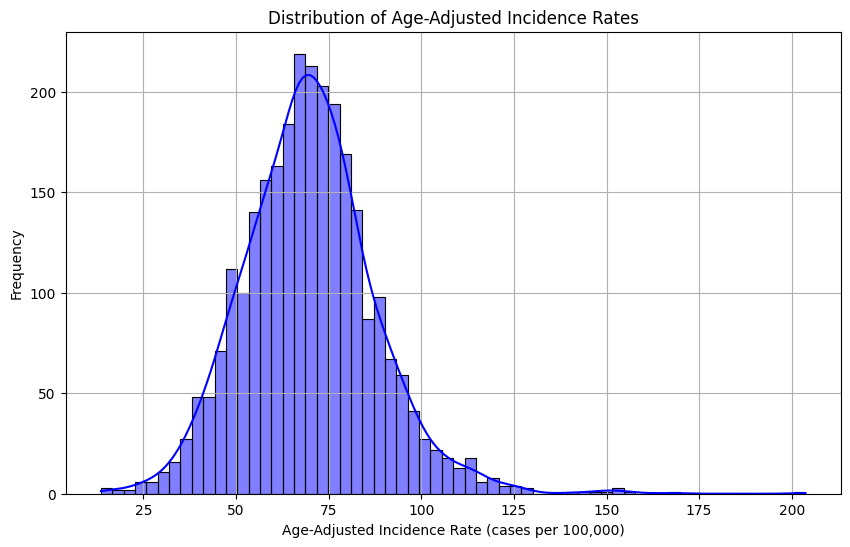

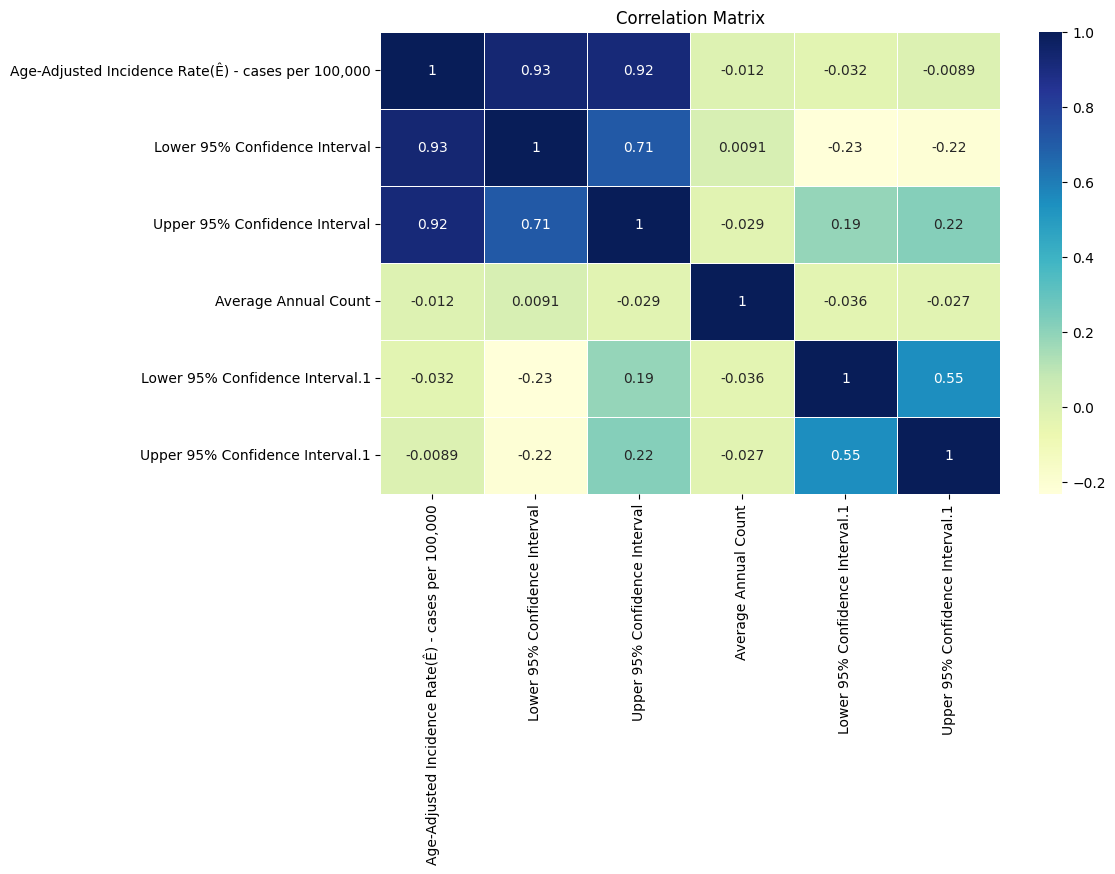

(       Age-Adjusted Incidence Rate(Ê) - cases per 100,000  \
 count                                        2719.000000    
 mean                                           69.826775    
 std                                            17.845617    
 min                                            13.500000    
 25%                                            58.400000    
 50%                                            69.300000    
 75%                                            79.900000    
 max                                           203.700000    
 
        Lower 95% Confidence Interval  Upper 95% Confidence Interval  \
 count                    2719.000000                    2719.000000   
 mean                       57.694226                      84.786981   
 std                        16.405942                      22.474616   
 min                         7.600000                      18.300000   
 25%                        46.600000                      70.400000   
 50%    

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Summary statistics for the cleaned data
summary_stats = incd_data_cleaned[numeric_columns].describe()

# Visualizing the distribution of Age-Adjusted Incidence Rates
plt.figure(figsize=(10, 6))
sns.histplot(incd_data_cleaned['Age-Adjusted Incidence Rate(Ê) - cases per 100,000'], kde=True, color='blue')
plt.title('Distribution of Age-Adjusted Incidence Rates')
plt.xlabel('Age-Adjusted Incidence Rate (cases per 100,000)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Correlation matrix
correlation_matrix = incd_data_cleaned[numeric_columns].corr()

# Heatmap to visualize correlations
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

summary_stats, correlation_matrix


Summary of Findings from the Exploratory Data Analysis (EDA):
Distribution of Age-Adjusted Incidence Rate

The age-adjusted incidence rate has a mean of about 69.83 cases per 100,000 with a standard deviation of 17.85.
The distribution is slightly skewed to the right, with a maximum value of 203.7 cases per 100,000.

Correlation Matrix:
The Age-Adjusted Incidence Rate shows minimal correlation with the other variables, indicating that none of them is a strong linear predictor.
Lower 95% and Upper 95% Confidence Intervals are moderately correlated with each other (0.547), which is expected as they represent bounds for the same estimate.


Average Annual Count shows weak correlations with other variables, suggesting it's not a strong predictor for age-adjusted incidence rates.
Next Step: Feature Selection and Regression Preparation
We will:

Use the Age-Adjusted Incidence Rate as the dependent variable (target).
Use relevant columns such as Lower/Upper Confidence Intervals and Average Annual Count as potential independent variables.
Split the data into training and testing sets, and build a linear regression model

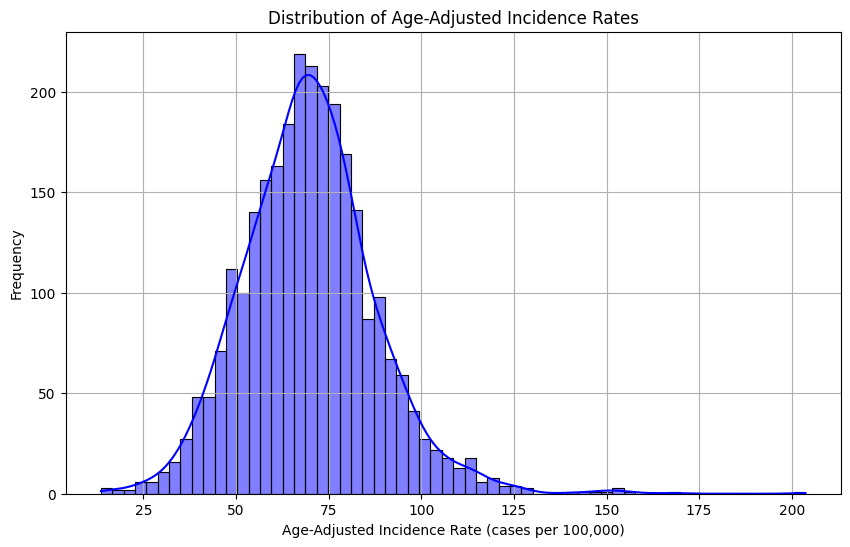

In [17]:
# Visualizing the distribution of Age-Adjusted Incidence Rates
plt.figure(figsize=(10, 6))
sns.histplot(incd_data_cleaned['Age-Adjusted Incidence Rate(Ê) - cases per 100,000'], kde=True, color='blue')
plt.title('Distribution of Age-Adjusted Incidence Rates')
plt.xlabel('Age-Adjusted Incidence Rate (cases per 100,000)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()




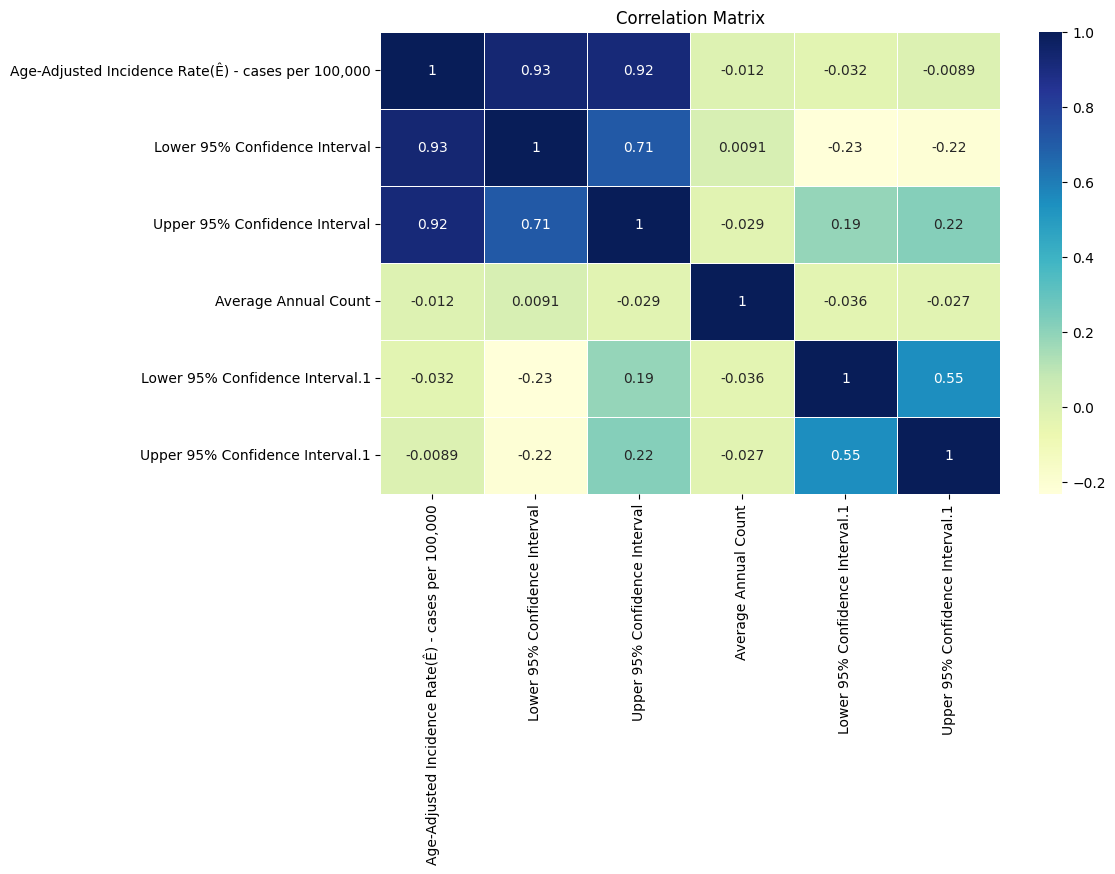

In [16]:
# Correlation matrix
correlation_matrix = incd_data_cleaned[numeric_columns].corr()

# Heatmap to visualize correlations
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [18]:
summary_stats, correlation_matrix

(       Age-Adjusted Incidence Rate(Ê) - cases per 100,000  \
 count                                        2719.000000    
 mean                                           69.826775    
 std                                            17.845617    
 min                                            13.500000    
 25%                                            58.400000    
 50%                                            69.300000    
 75%                                            79.900000    
 max                                           203.700000    
 
        Lower 95% Confidence Interval  Upper 95% Confidence Interval  \
 count                    2719.000000                    2719.000000   
 mean                       57.694226                      84.786981   
 std                        16.405942                      22.474616   
 min                         7.600000                      18.300000   
 25%                        46.600000                      70.400000   
 50%    

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Define the target (y) and features (X)
X = incd_data_cleaned[['Lower 95% Confidence Interval', 'Upper 95% Confidence Interval', 'Average Annual Count']]
y = incd_data_cleaned['Age-Adjusted Incidence Rate(Ê) - cases per 100,000']

# Drop rows with missing values in either X or y
X = X.dropna()
y = y[X.index]

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Coefficients of the model
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

r2, rmse, coefficients


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(0.9992881078402502,
 0.49773103087220405,
                          Feature  Coefficient
 0  Lower 95% Confidence Interval     0.615862
 1  Upper 95% Confidence Interval     0.409313
 2           Average Annual Count    -0.000007)

In [20]:
# Define the target (y) and features (X)
X = incd_data_cleaned[['Lower 95% Confidence Interval', 'Upper 95% Confidence Interval', 'Average Annual Count']]
y = incd_data_cleaned['Age-Adjusted Incidence Rate(Ê) - cases per 100,000']

# Drop rows with missing values in either X or y
X = X.dropna()
y = y[X.index]

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Coefficients of the model
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

r2, rmse, coefficients


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(0.9992881078402502,
 0.49773103087220405,
                          Feature  Coefficient
 0  Lower 95% Confidence Interval     0.615862
 1  Upper 95% Confidence Interval     0.409313
 2           Average Annual Count    -0.000007)

In [22]:
# Evaluate the model
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Coefficients of the model
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

r2, rmse, coefficients

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(0.9992881078402502,
 0.49773103087220405,
                          Feature  Coefficient
 0  Lower 95% Confidence Interval     0.615862
 1  Upper 95% Confidence Interval     0.409313
 2           Average Annual Count    -0.000007)

The next step after building and training the linear regression model would be **model evaluation and diagnostics**. Here’s what to do next:


### 1. **Evaluate the Model Performance:**
   - **R² Score**: Measures how well the model explains the variance in the dependent variable (Age-Adjusted Incidence Rate). A higher R² indicates a better fit.
   - **Root Mean Squared Error (RMSE)**: Measures the average magnitude of the prediction error. Lower RMSE means better predictive performance.
   
### 2. **Check the Coefficients:**

   - Analyze the coefficients of the regression model to understand the impact of each predictor variable (e.g., Lower 95% Confidence Interval, Upper 95% Confidence Interval, Average Annual Count) on the Age-Adjusted Incidence Rate.


### 3. **Perform Residual Analysis:**


   - **Residuals** are the differences between the observed and predicted values.
   - Plot the residuals to check if they are normally distributed and homoscedastic (i.e., constant variance across fitted values), which are assumptions of linear regression.
   

### 4. **Check for Multicollinearity:**
   - Use **Variance Inflation Factor (VIF)** to check if the independent variables are highly correlated with each other, which can inflate the variance of the coefficients and reduce model reliability.

Would you like help running these steps or interpreting the results?

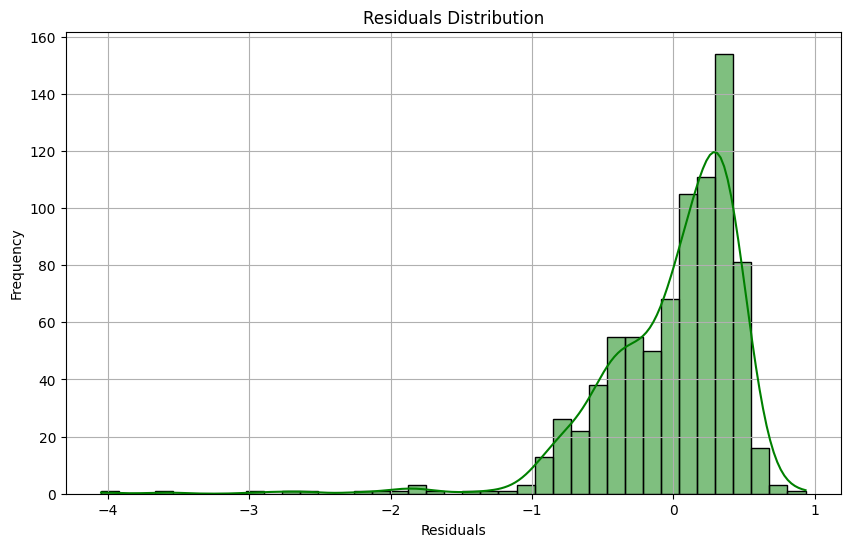

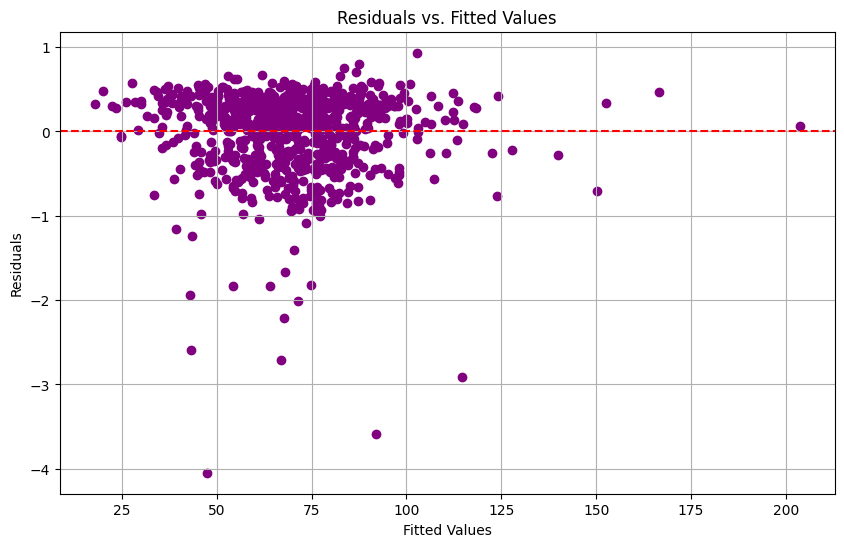

(0.9992881078402502,
 0.49773103087220405,
                          Feature  Coefficient
 0  Lower 95% Confidence Interval     0.615862
 1  Upper 95% Confidence Interval     0.409313
 2           Average Annual Count    -0.000007,
                          Feature       VIF
 0  Lower 95% Confidence Interval  1.941923
 1  Upper 95% Confidence Interval  1.943638
 2           Average Annual Count  1.002955)

In [23]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 1. Evaluate Model Performance
# R² and RMSE were already calculated above (R² and RMSE), so no need to recalculate.
r2, rmse

# 2. Check the Coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

# 3. Perform Residual Analysis
# Calculate residuals
residuals = y_test - y_pred

# Plot the residuals to check if they are normally distributed
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='green')
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot residuals vs. fitted values to check for homoscedasticity
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# 4. Check for Multicollinearity using VIF
# Adding constant for statsmodels
X_with_constant = sm.add_constant(X_train)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_constant.values, i+1) for i in range(len(X.columns))]

r2, rmse, coefficients, vif_data


2. Check the Coefficients:
Analyze the coefficients of the regression model to understand the impact of each predictor variable (e.g., Lower 95% Confidence Interval, Upper 95% Confidence Interval, Average Annual Count) on the Age-Adjusted Incidence Rate.

In [24]:
# 2. Check the Coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

3. Perform Residual Analysis:
Residuals are the differences between the observed and predicted values.
Plot the residuals to check if they are normally distributed and homoscedastic (i.e., constant variance across fitted values), which are assumptions of linear regression.


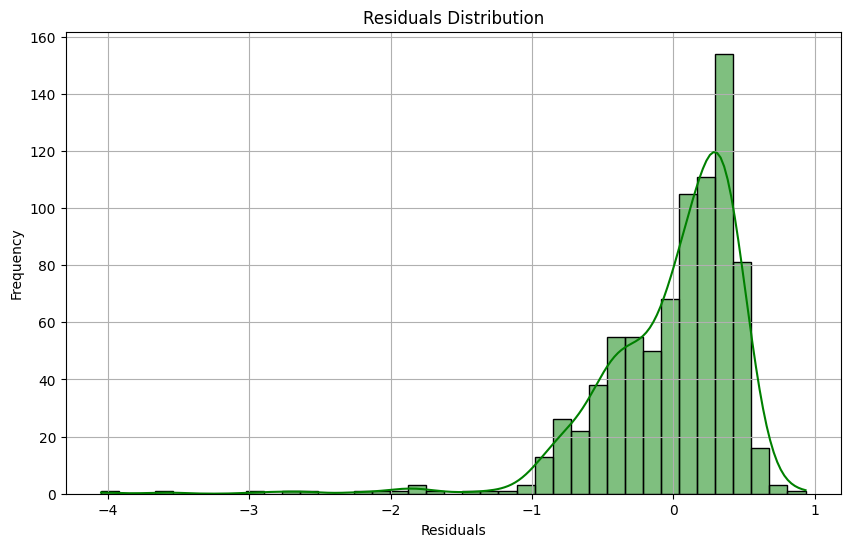

In [25]:
# 3. Perform Residual Analysis
# Calculate residuals
residuals = y_test - y_pred

# Plot the residuals to check if they are normally distributed
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='green')
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

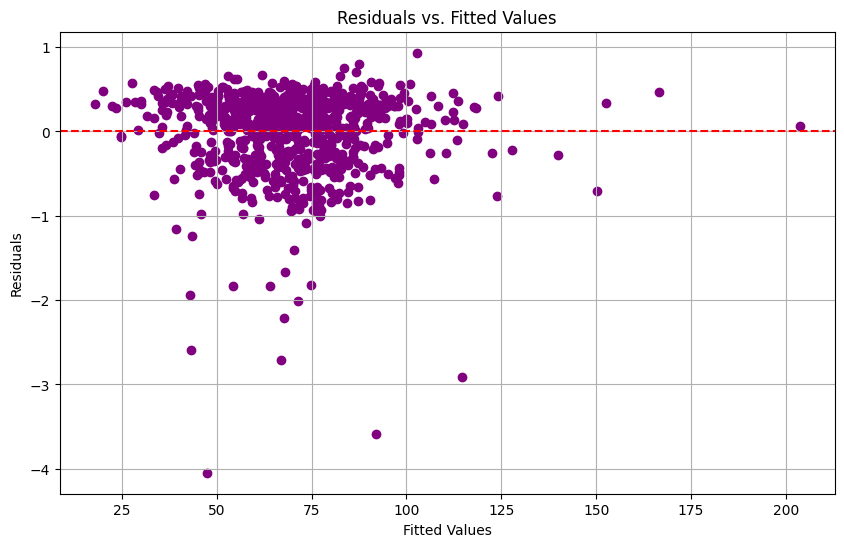

In [26]:

# Plot residuals vs. fitted values to check for homoscedasticity
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()



4. Check for Multicollinearity:
Use Variance Inflation Factor (VIF) to check if the independent variables are highly correlated with each other, which can inflate the variance of the coefficients and reduce model reliability.
Would you like help running these steps or interpreting the results?

In [27]:
# 4. Check for Multicollinearity using VIF
# Adding constant for statsmodels
X_with_constant = sm.add_constant(X_train)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_constant.values, i+1) for i in range(len(X.columns))]

r2, rmse, coefficients, vif_data

(0.9992881078402502,
 0.49773103087220405,
                          Feature  Coefficient
 0  Lower 95% Confidence Interval     0.615862
 1  Upper 95% Confidence Interval     0.409313
 2           Average Annual Count    -0.000007,
                          Feature       VIF
 0  Lower 95% Confidence Interval  1.941923
 1  Upper 95% Confidence Interval  1.943638
 2           Average Annual Count  1.002955)

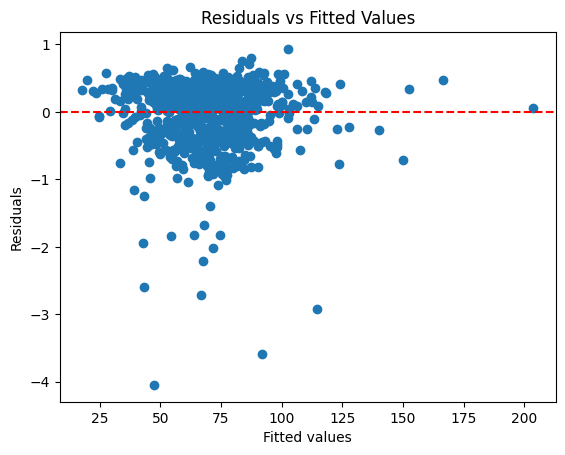

In [28]:
import matplotlib.pyplot as plt

# Residuals
residuals = y_test - y_pred

# Plotting residuals
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()


In [29]:
new_data = [[5.5, 3.1, 4.7]]  # Example new data
prediction = model.predict(new_data)
print(f'Predicted value: {prediction}')


Predicted value: [4.2505528]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
